# Vehicle dataset
This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

1. name
2. year
3. selling_price
4. km_driven
5. fuel
6. seller_type
7. transmission
8. Owner

##  Objective
The goal of this project is to predict the **selling price** of used cars based on their technical and categorical features such as year, fuel type, kilometers driven, and transmission.
This kind of analysis helps car dealerships and individual sellers make informed pricing decisions. For buyers, it can also indicate fair market values.

##  Problem Statement
We aim to build a regression model that accurately predicts car selling prices.
This involves:
- Handling categorical and numerical features
- Cleaning and preparing the dataset
- Applying and evaluating a machine learning model

The main challenge lies in the variety of factors that influence car pricing (brand perception, age, fuel efficiency, etc.), many of which may be correlated or non-linear.

## Importing the Dependencies

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics

## Data Collection and Processing

In [62]:
# Loading the data from csv file to pandas dataframe
car_data = pd.read_csv('/content/drive/MyDrive/ML/car/car data.csv')

In [54]:
# Inspecting the first 5 rows of the dataframe
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# Checking the number of rows and columns
car_data.shape

(301, 9)

In [6]:
# Getting some information about the dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# Checking the number of missing values
car_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [10]:
# Checking the distribution of categorical data
print(car_data.Fuel_Type.value_counts())
print('-'*50)
print(car_data.Seller_Type.value_counts())
print('-'*50)
print(car_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
--------------------------------------------------
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
--------------------------------------------------
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


## Feature Engineering

Before training our models, we must transform and create features to improve model performance:

- Convert `year` to `car_age` to better represent the age of the vehicle
- Convert categorical columns like `fuel`, `seller_type`, `transmission`, and `owner` into numerical format using one-hot encoding

In [55]:
# Create 'Car_age' feature
car_data['car_age'] = 2025 - car_data['Year']

# Drop original 'Year' column
car_data.drop(['Year'], axis=1)


,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,11
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,9
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,10
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,16
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,8


## Data Visualization

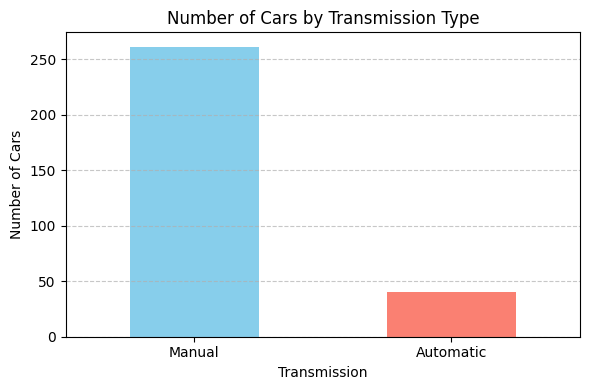

In [63]:
# Count the number of cars by transmission type
transmission_counts = car_data['Transmission'].value_counts()

# Create bar chart
plt.figure(figsize=(6, 4))
transmission_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Number of Cars by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Number of Cars')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Fuel Type Distribution'}, ylabel='count'>

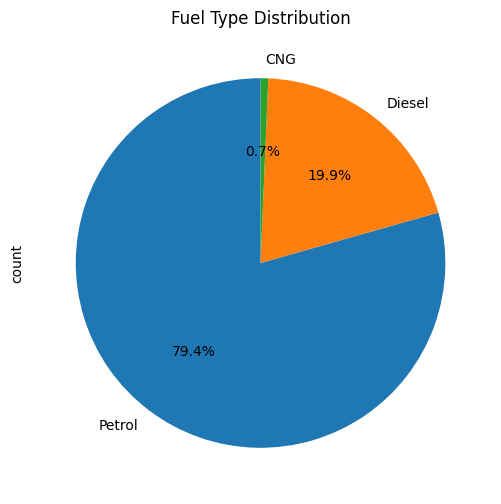

In [65]:
fuel_counts = car_data['Fuel_Type'].value_counts()
fuel_counts.plot.pie(
    autopct='%1.1f%%',        # Show percentage
    startangle=90,            # Rotate to start from top
    figsize=(6, 6),
    title='Fuel Type Distribution'
)

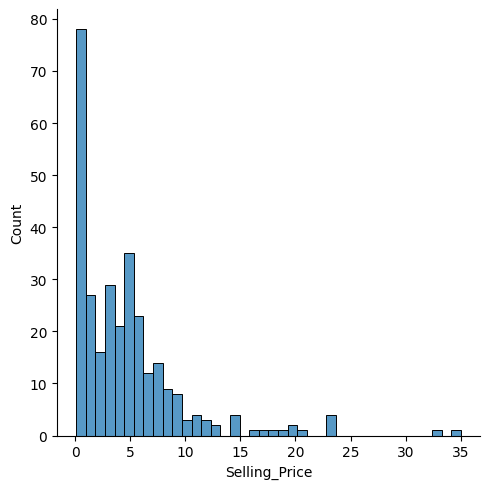

In [67]:
sns.displot(car_data['Selling_Price'], bins=40)

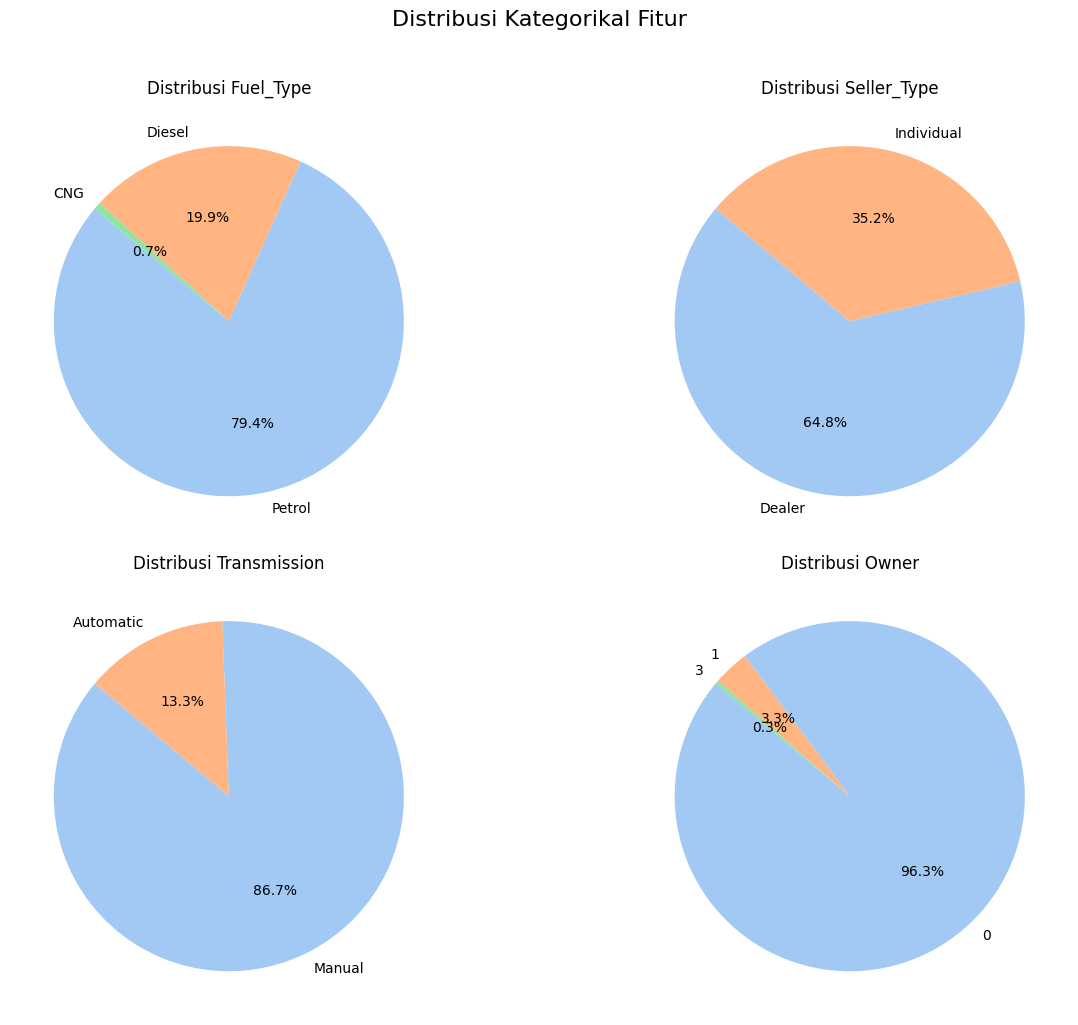

In [69]:
car_features = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(14, 10))

for i, feature in enumerate(car_features, 1):
    plt.subplot(2, 2, i)

    # Hitung frekuensi masing-masing kategori
    counts = car_data[feature].value_counts()

    # Buat pie chart
    plt.pie(
        counts,
        labels=counts.index,
        colors=colors,
        autopct='%1.1f%%',
        startangle=140
    )

    plt.title(f'Distribusi {feature}', fontsize=12)

plt.suptitle('Distribusi Kategorikal Fitur', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [56]:
# Encoding "Fuel_Type" Column
car_data.replace({
    'Fuel_Type' : {
        'Petrol': 0,
        'Diesel': 1,
        'CNG': 2
    }
}, inplace=True)

# encoding "Seller_Type" Column
car_data.replace({
    'Seller_Type' : {
        'Dealer': 0,
        'Individual': 1
    }
}, inplace=True)
# encoding "Transmission" Column
car_data.replace({
    'Transmission' : {
        'Manual': 0,
        'Individual': 1
    }
}, inplace=True)

/tmp/ipython-input-56-1212232455.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({
/tmp/ipython-input-56-1212232455.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({


In [57]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,ritz,2014,3.35,5.59,27000,0,0,0,0,11
1,sx4,2013,4.75,9.54,43000,1,0,0,0,12
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,8
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,14
4,swift,2014,4.60,6.87,42450,1,0,0,0,11


## Hypothesis Testing: Effect of Ownership Type on Selling Price
We want to test whether the ownership type of a car (e.g., First owner, Second owner, etc.) has a significant effect on its selling price.

Hypotheses
Null Hypothesis (H₀): The average selling price is the same across all ownership types.

Alternative Hypothesis (H₁): At least one ownership group has a different mean selling price.

Test Used
We use a one-way ANOVA (Analysis of Variance) to compare the means between ownership groups.

In [61]:
import scipy.stats as stats

# Get the unique ownership types
ownership_groups = car_data['Owner'].unique()

# Create separate groups of selling prices by ownership type
price_groups = [car_data[car_data['Owner'] == owner]['Selling_Price'] for owner in ownership_groups]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*price_groups)

print("F-Statistic:", f_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: Ownership type affects selling price.")
else:
    print("Fail to reject the null hypothesis: No significant effect of ownership on price.")


F-Statistic: 1.5543368354019291
p-value: 0.21303783036545662
Fail to reject the null hypothesis: No significant effect of ownership on price.


## Splitting the data and Target

In [14]:
X = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_data['Selling_Price']

In [15]:
print(X)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]


In [16]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


## Splitting Training and Test data

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

## Model Training
### Linear Regression


In [19]:
# Loading the linear regression model
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(x_train, y_train)

## Model Evaluation

In [21]:
# Prediction o Traning data
train_data_pred = lin_reg_model.predict(x_train)

In [23]:
# R squared Error
error_score = metrics.r2_score(y_train, train_data_pred)
print(f"R Squared Error: {error_score}")

R Squared Error: 0.8799451660493711


## Visualize the actual prices and Predicted prices

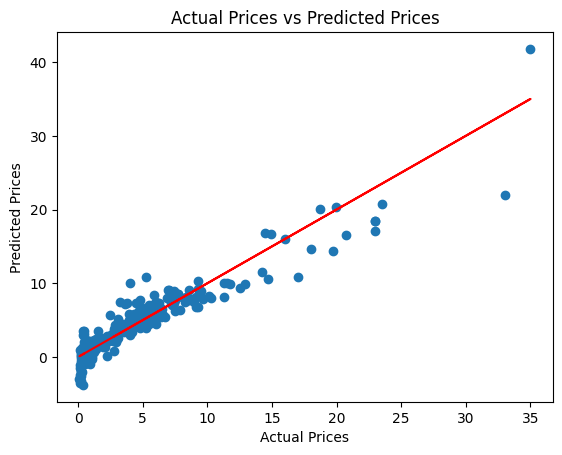

In [25]:
plt.scatter(y_train, train_data_pred)
plt.plot(y_train, y_train, color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [26]:
# Prediction on Test data
test_data_pred = lin_reg_model.predict(x_test)

In [27]:
# R Squared Error
error_score_test = metrics.r2_score(y_test, test_data_pred)
print(f'R Squared Error: {error_score_test}')

R Squared Error: 0.8365766715027051


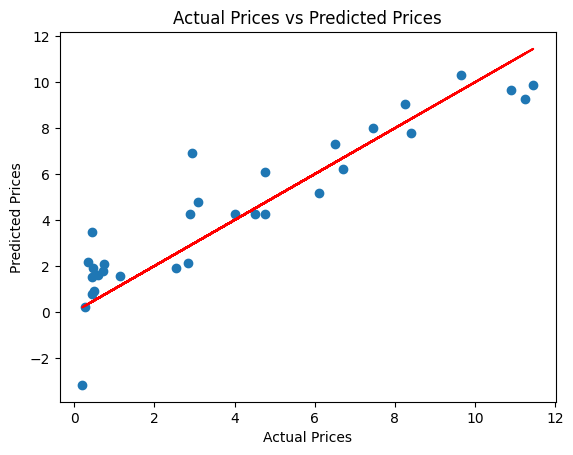

In [28]:
plt.scatter(y_test, test_data_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

## Lasso Regression

In [29]:
# Loading the linear regression model
lass_reg_model = Lasso()

In [ ]:
lass_reg_model.fit(x_train, y_train)

## Model Evaluation

In [31]:
# Prediction o Traning data
train_data_pred_lass = lass_reg_model.predict(x_train)

In [32]:
# R squared Error
error_score_train_lass = metrics.r2_score(y_train, train_data_pred_lass)
print("R squared Error : ", error_score_train_lass)

R squared Error :  0.8427856123435794


## Visualize the actual prices and Predicted prices

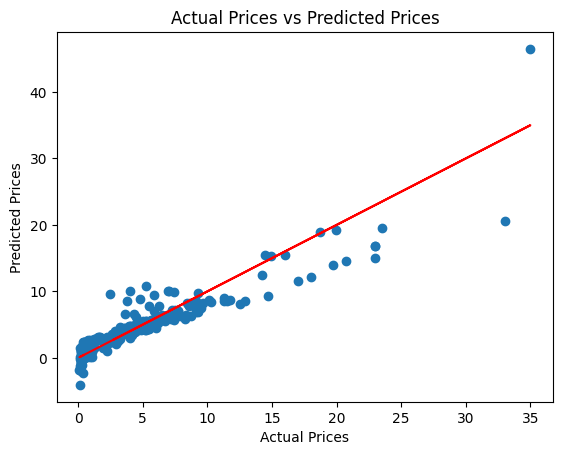

In [33]:
plt.scatter(y_train, train_data_pred_lass)
plt.plot(y_train, y_train, color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [34]:
# prediction on Test data
test_data_pred_lass = lass_reg_model.predict(x_test)

In [35]:
# R squared Error
error_score_test_lass = metrics.r2_score(y_test, test_data_pred_lass)
print("R squared Error : ", error_score_test_lass)

R squared Error :  0.8709167941173195


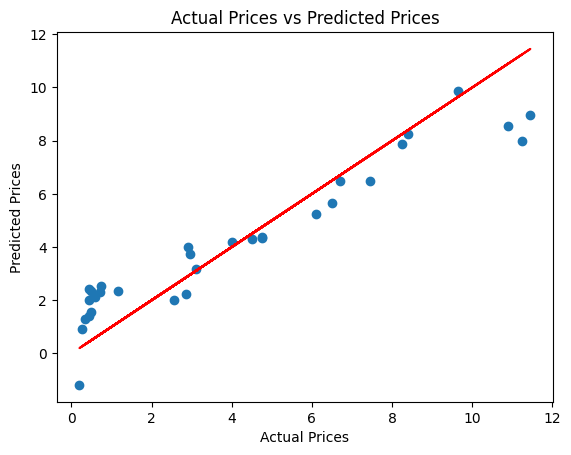

In [36]:
plt.scatter(y_test,test_data_pred_lass)
plt.plot(y_test, y_test, color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

## Conclusion

- Linear regression can reasonably predict car prices based on structured features.
- Fuel type and car age are significant predictors of price.
- Lasso helps reduce overfitting by penalizing less important features.

**Future Work:**
- Use more complex models like Random Forest or Gradient Boosting
- Deploy as a web app using Streamlit or Flask

## References

- Dataset: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/data
- Python Libraries: `pandas`, `scikit-learn`, `seaborn`, `matplotlib`, `scipy`
